In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [4]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_teste.shape, Y_census_teste.shape 

((4885, 108), (4885,))

In [37]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [38]:
random_forest_census.fit(X_census_treinamento, Y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [39]:
previsoes = random_forest_census.predict(X_census_teste)

In [40]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [41]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

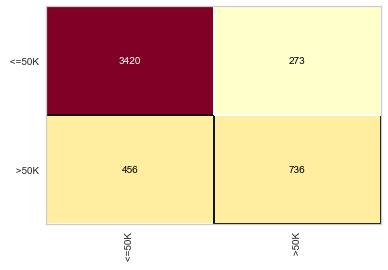

In [45]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [46]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

